In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random
import plotly.graph_objects as go
import seaborn as sns

plt.style.use("default")
random.seed(1)

# Notebook Purpose
I used this notebook for data analysis and creating visualizations for the main application

In [2]:
df = pd.read_csv('CSV_files/Health_data_cleaned.csv')

In [3]:
df.shape

(280703, 52)

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

# Explore the dataset

 
## 1. Demographic makeup 

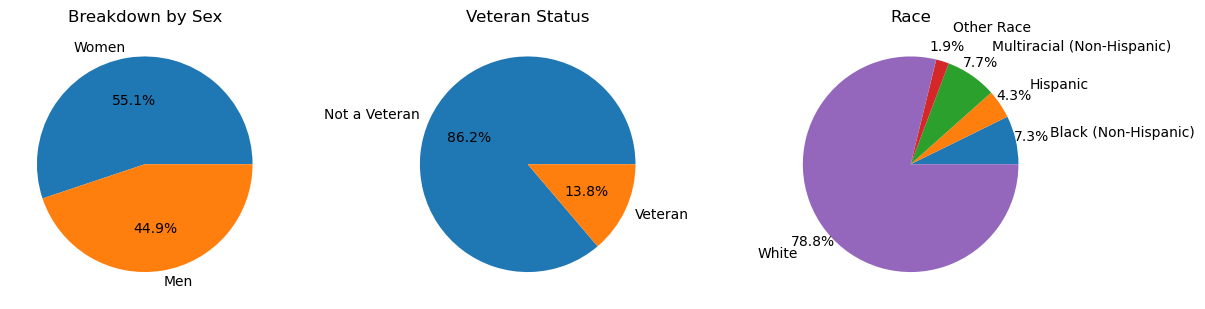

In [524]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,3.5))

sex = df.Sex.value_counts()
sex_labels = "Women", "Men"
sex_values = sex[0], sex[1] 
ax[0].pie(sex_values, labels=sex_labels, autopct='%1.1f%%')
ax[0].set_title("Breakdown by Sex")


vet = df.Veteran.value_counts()
vet_labels = ["Not a Veteran", "Veteran"]
vet_values = [ vet[0], vet[1] ]
ax[1].pie(vet_values, labels=vet_labels, autopct='%1.1f%%')
ax[1].set_title("Veteran Status")

black = df['Black_(Non-Hispanic)'].value_counts()
hispanic = df.Hispanic.value_counts()
multiracial = df['Multiracial_(Non-Hispanic)'].value_counts()
other = df.Other_race_only.value_counts()
white = df['White_(Non-Hispanic)'].value_counts()

race_labels = ["Black (Non-Hispanic)", "Hispanic", "Multiracial (Non-Hispanic)", "Other Race", "White"]
race_values = [ black[1], hispanic[1], multiracial[1], other[1], white[1] ]
ax[2].pie(race_values, labels=race_labels, autopct='%1.1f%%', pctdistance=1.15, labeldistance=1.33)
ax[2].set_title("Race")

plt.savefig('images/fig1.png', bbox_inches='tight')

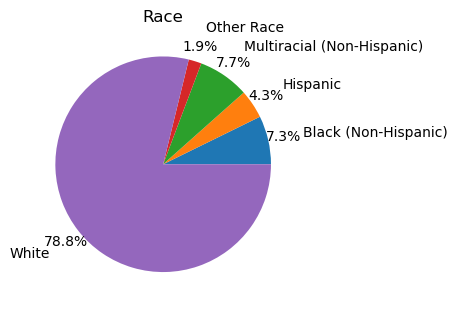

In [494]:
fig, ax = plt.subplots(figsize=(7,3.5))
black = df['Black_(Non-Hispanic)'].value_counts()
hispanic = df.Hispanic.value_counts()
multiracial = df['Multiracial_(Non-Hispanic)'].value_counts()
other = df.Other_race_only.value_counts()
white = df['White_(Non-Hispanic)'].value_counts()

race_labels = ["Black (Non-Hispanic)", "Hispanic", "Multiracial (Non-Hispanic)", "Other Race", "White"]
race_values = [ black[1], hispanic[1], multiracial[1], other[1], white[1] ]
ax.pie(race_values, labels=race_labels, autopct='%1.1f%%', pctdistance=1.15, labeldistance=1.33)
ax.set_title("Race")

plt.savefig('images/fig2.png', bbox_inches='tight')

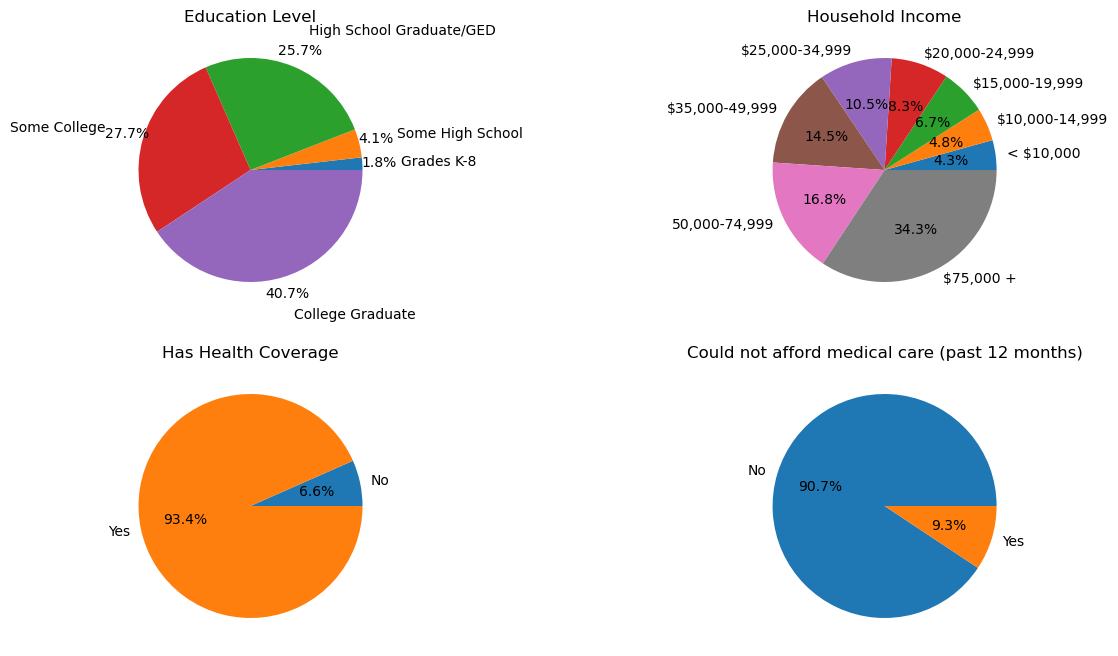

In [502]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

ed = df.Education_Level.value_counts()
ed_labels = ["Grades K-8", "Some High School", "High School Graduate/GED", "Some College", "College Graduate"]
ed_values = [ ed[2], ed[3], ed[4], ed[5], ed[6] ] 
ax[0][0].pie(ed_values, labels=ed_labels, autopct='%1.1f%%', pctdistance=1.15, labeldistance=1.35)
ax[0][0].set_title("Education Level")

income = df.Household_Income.value_counts()
income_labels = ["< $10,000", "$10,000-14,999", "$15,000-19,999", "$20,000-24,999", "$25,000-34,999", "$35,000-49,999", "50,000-74,999", "$75,000 +"]
income_values = [ income[0], income[10], income[15], income[20], income[25], income[35], income[50], income[75] ]
ax[0][1].pie(income_values, labels=income_labels, autopct='%1.1f%%')
ax[0][1].set_title("Household Income")

labels = "No", "Yes"
cover = df.Has_Health_Coverage.value_counts()
cover_val = cover[0], cover[1]
ax[1][0].pie(cover_val, labels=labels, autopct='%1.1f%%')
ax[1][0].set_title("Has Health Coverage")

afford = df.Could_not_afford_to_see_doctor.value_counts()
afford_val = afford[0], afford[1]
ax[1][1].pie(afford_val, labels=labels, autopct='%1.1f%%')
ax[1][1].set_title("Could not afford medical care (past 12 months)")

plt.savefig('images/fig3.png', bbox_inches='tight')

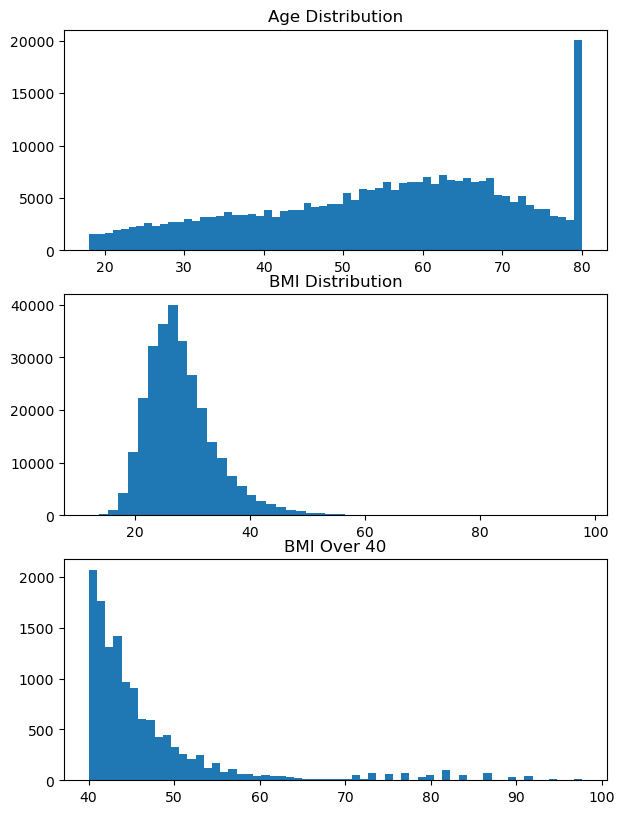

In [510]:
fig, ax = plt.subplots(nrows=3, figsize=(7,9.75))
ax[0].hist(df.Age, bins = 62)
ax[0].set_title("Age Distribution")

ax[1].hist(df.BMI, bins = 50)
ax[1].set_title("BMI Distribution")

ax[2].hist(df.BMI[df.BMI > 40], bins = 60)
ax[2].set_title("BMI Over 40")

plt.savefig('images/fig4.png', bbox_inches='tight')

Note: The survey had a maximum imputed age of 80, so all those surveyed over 80 are listed as age 80.

# Health Diagnoses

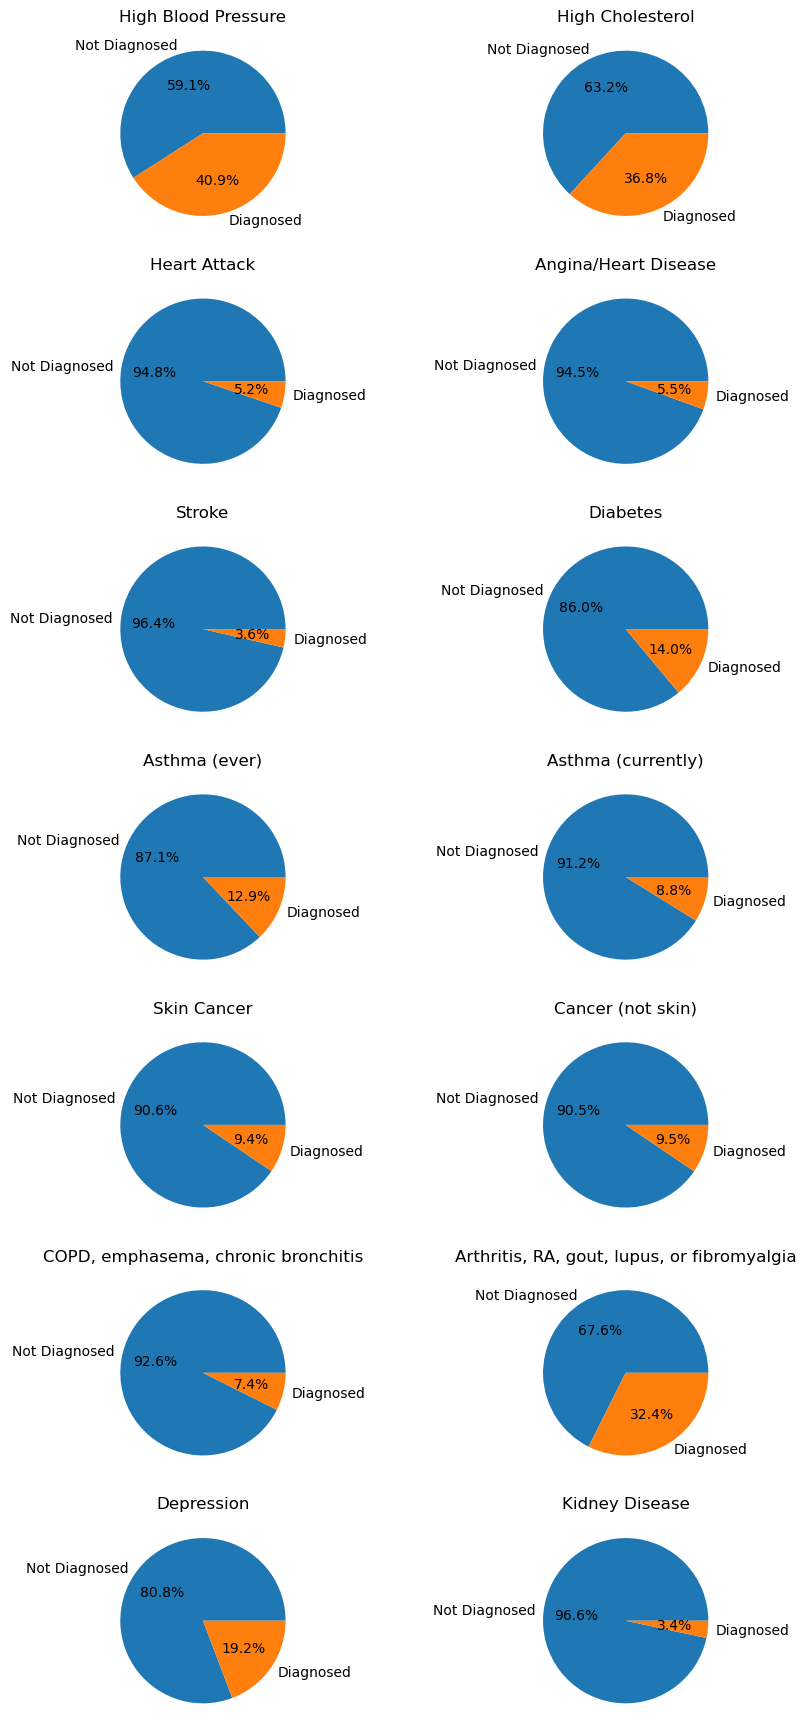

In [452]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,22))

labels = "Not Diagnosed", "Diagnosed"

HBP = df.High_Blood_Pressure.value_counts()
HBP_val = HBP[0], HBP[1]
ax[0,0].pie(HBP_val, labels=labels, autopct='%1.1f%%')
ax[0,0].set_title("High Blood Pressure")

HC = df.High_Cholesterol.value_counts()
HC_val = HC[0], HC[1]
ax[0,1].pie(HC_val, labels=labels, autopct='%1.1f%%')
ax[0,1].set_title("High Cholesterol")

HA = df.Heart_Attack.value_counts()
HA_val = HA[0], HA[1]
ax[1,0].pie(HA_val, labels=labels, autopct='%1.1f%%')
ax[1,0].set_title("Heart Attack")

HD = df['Angina/Heart_Disease'].value_counts()
HD_val = HD[0], HD[1]
ax[1,1].pie(HD_val, labels=labels, autopct='%1.1f%%')
ax[1,1].set_title("Angina/Heart Disease")

Stroke = df.Stroke.value_counts()
Stroke_val = Stroke[0], Stroke[1]
ax[2,0].pie(Stroke_val, labels=labels, autopct='%1.1f%%')
ax[2,0].set_title("Stroke")

Diab = df.Diabetes.value_counts()
Diab_val = Diab[0], Diab[1]
ax[2,1].pie(Diab_val, labels=labels, autopct='%1.1f%%')
ax[2,1].set_title("Diabetes")

Asth = df['Asthma_(ever)'].value_counts()
Asth_val = Asth[0], Asth[1]
ax[3,0].pie(Asth_val, labels=labels, autopct='%1.1f%%')
ax[3,0].set_title("Asthma (ever)")

A_curr = df['Asthma_(currently)'].value_counts()
A_curr_val = A_curr[0], A_curr[1]
ax[3,1].pie(A_curr_val, labels=labels, autopct='%1.1f%%')
ax[3,1].set_title('Asthma (currently)')

Skin = df.Skin_Cancer.value_counts()
Skin_val = Skin[0], Skin[1]
ax[4,0].pie(Skin_val, labels=labels, autopct='%1.1f%%')
ax[4,0].set_title("Skin Cancer")

Canc = df['Cancer_(not skin)'].value_counts()
Canc_val = Canc[0], Canc[1]
ax[4,1].pie(Canc_val, labels=labels, autopct='%1.1f%%')
ax[4,1].set_title('Cancer (not skin)')

Copd = df.COPD_emphasema_chronic_bronchitis.value_counts()
Copd_val = Copd[0], Copd[1]
ax[5,0].pie(Copd_val, labels=labels, autopct='%1.1f%%')
ax[5,0].set_title("COPD, emphasema, chronic bronchitis")

Arth = df.Arthritis_RA_gout_lupus_fibromyalgia.value_counts()
Arth_val = Arth[0], Arth[1]
ax[5,1].pie(Arth_val, labels=labels, autopct='%1.1f%%')
ax[5,1].set_title("Arthritis, RA, gout, lupus, or fibromyalgia")

Depr = df.Depression.value_counts()
Depr_val = Depr[0], Depr[1]
ax[6,0].pie(Depr_val, labels=labels, autopct='%1.1f%%')
ax[6,0].set_title("Depression")

Kid = df.Kidney_Disease.value_counts()
Kid_val = Kid[0], Kid[1]
ax[6,1].pie(Kid_val, labels=labels, autopct='%1.1f%%')
ax[6,1].set_title("Kidney Disease")

plt.savefig('images/fig5.png', bbox_inches='tight')

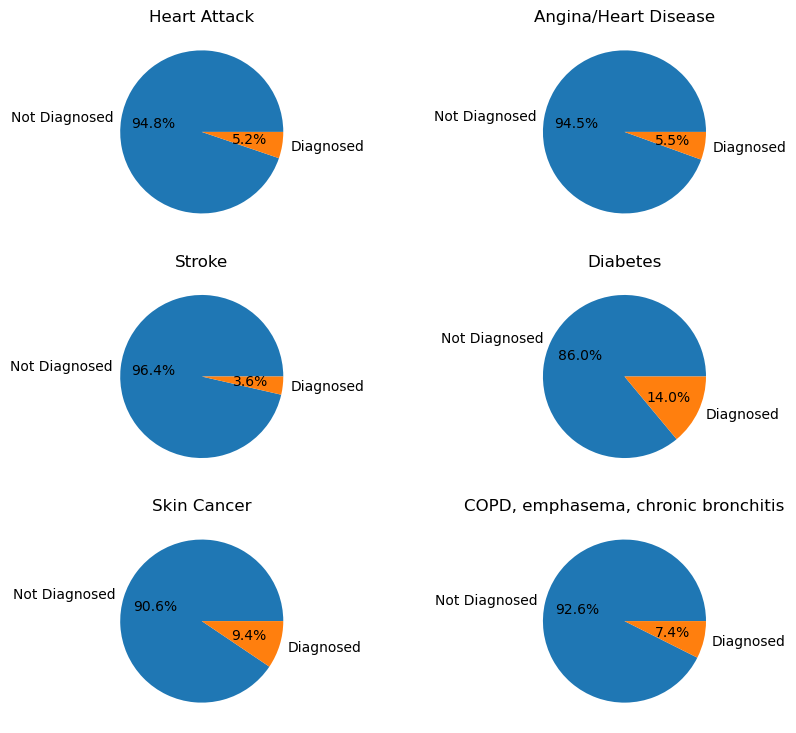

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,9))

labels = "Not Diagnosed", "Diagnosed"

HA = df.Heart_Attack.value_counts()
HA_val = HA[0], HA[1]
ax[0,0].pie(HA_val, labels=labels, autopct='%1.1f%%')
ax[0,0].set_title("Heart Attack")

HD = df['Angina/Heart_Disease'].value_counts()
HD_val = HD[0], HD[1]
ax[0,1].pie(HD_val, labels=labels, autopct='%1.1f%%')
ax[0,1].set_title("Angina/Heart Disease")

Stroke = df.Stroke.value_counts()
Stroke_val = Stroke[0], Stroke[1]
ax[1,0].pie(Stroke_val, labels=labels, autopct='%1.1f%%')
ax[1,0].set_title("Stroke")

Diab = df.Diabetes.value_counts()
Diab_val = Diab[0], Diab[1]
ax[1,1].pie(Diab_val, labels=labels, autopct='%1.1f%%')
ax[1,1].set_title("Diabetes")

Skin = df.Skin_Cancer.value_counts()
Skin_val = Skin[0], Skin[1]
ax[2,0].pie(Skin_val, labels=labels, autopct='%1.1f%%')
ax[2,0].set_title("Skin Cancer")

# Canc = df['Cancer_(not skin)'].value_counts()
#Canc_val = Canc[0], Canc[1]
#ax[4,1].pie(Canc_val, labels=labels, autopct='%1.1f%%')
#ax[4,1].set_title('Cancer (not skin)')

Copd = df.COPD_emphasema_chronic_bronchitis.value_counts()
Copd_val = Copd[0], Copd[1]
ax[2,1].pie(Copd_val, labels=labels, autopct='%1.1f%%')
ax[2,1].set_title("COPD, emphasema, chronic bronchitis")

plt.savefig('images/classImb.png', bbox_inches='tight')

### Tobacco Use

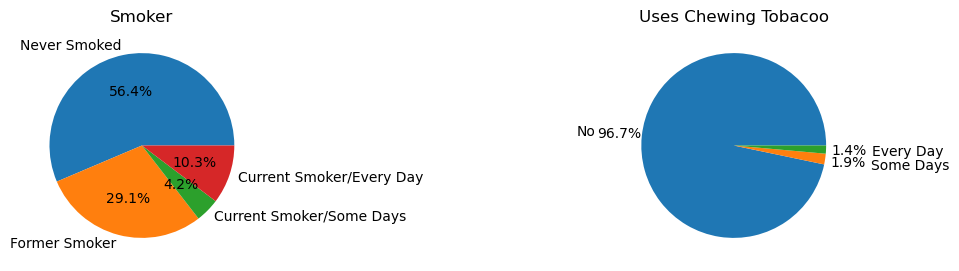

In [462]:
#'Smoker', 'Days_at_least_1_drink_recently',
#'Binge_Drinking_last_30_days', 'Chewing_tobacco'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))

smoke_labels = "Never Smoked", "Former Smoker", "Current Smoker/Some Days", "Current Smoker/Every Day"
chew_labels = "No", "Some Days", "Every Day"

smoke = df.Smoker.value_counts()
smoke_val = smoke[0], smoke[1], smoke[3], smoke[4]
ax[0].pie(smoke_val, labels=smoke_labels, autopct='%1.1f%%')
ax[0].set_title("Smoker")

chew = df.Chewing_tobacco.value_counts()
chew_val = chew[0], chew[1], chew[2]
ax[1].pie(df.Chewing_tobacco.value_counts(), labels=chew_labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=1.5)
ax[1].set_title("Uses Chewing Tobacoo")


plt.savefig('images/fig6.png', bbox_inches='tight')

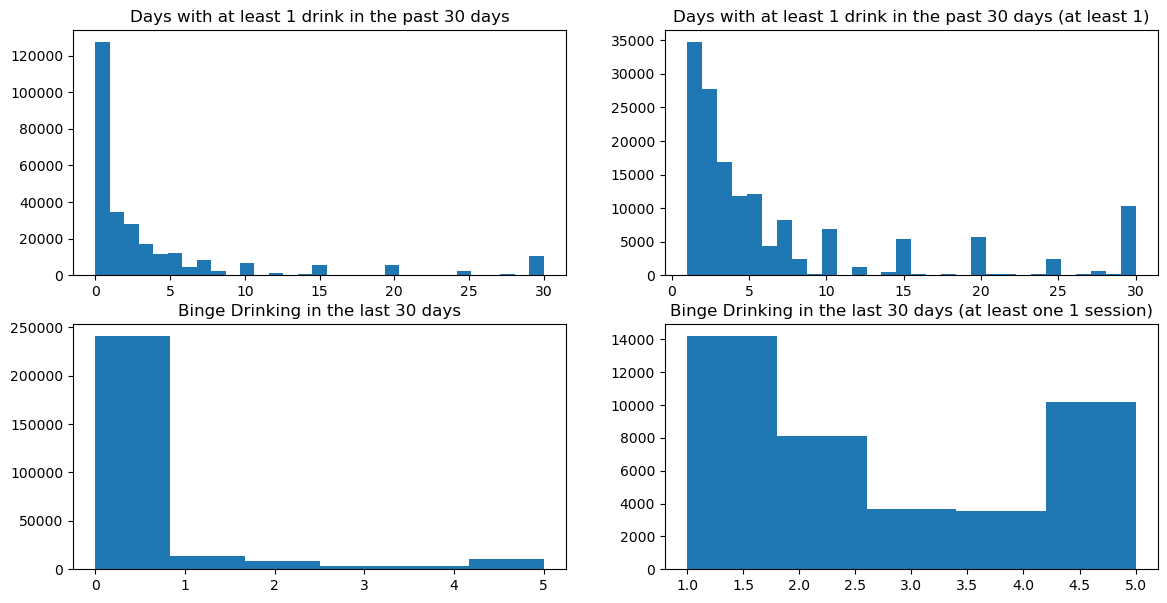

In [512]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
ax[0][0].hist(df.Days_at_least_1_drink_recently, bins = 31)
ax[0][0].set_title("Days with at least 1 drink in the past 30 days")

ax[0][1].hist(df.Days_at_least_1_drink_recently[df.Days_at_least_1_drink_recently > 0], bins = 30)
ax[0][1].set_title("Days with at least 1 drink in the past 30 days (at least 1)")

ax[1][0].hist(df.Binge_Drinking_last_30_days, bins = 6)
ax[1][0].set_title("Binge Drinking in the last 30 days")

ax[1][1].hist(df.Binge_Drinking_last_30_days[df.Binge_Drinking_last_30_days > 0], bins = 5)
ax[1][1].set_title("Binge Drinking in the last 30 days (at least one 1 session)")

plt.savefig('images/fig7.png', bbox_inches='tight')

# Exercise

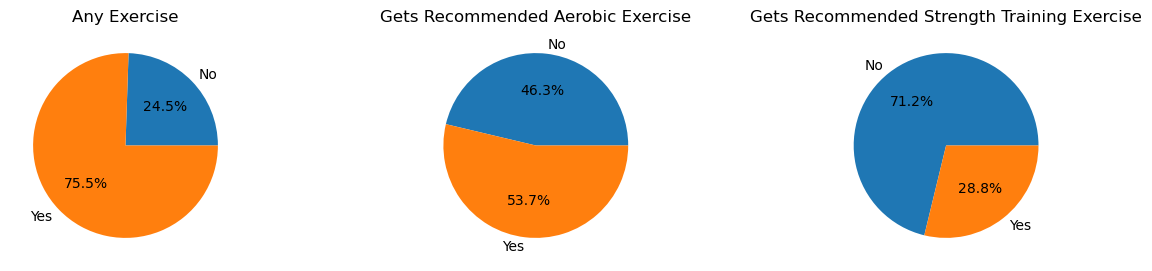

In [468]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

labels = "No", "Yes"

Exer = df.Any_Excercise.value_counts()
Exer_val = Exer[0], Exer[1]
ax[0].pie(Exer_val, labels=labels, autopct='%1.1f%%')
ax[0].set_title("Any Exercise")

Aer = df.Aerobic_Excercise.value_counts()
Aer_val = Aer[0], Aer[1] 
ax[1].pie(Aer_val, labels=labels, autopct='%1.1f%%')
ax[1].set_title("Gets Recommended Aerobic Exercise")

Str = df.Strength_Excercise.value_counts()
Str_vals = Str[0], Str[1]
ax[2].pie(Str_vals, labels=labels, autopct='%1.1f%%')
ax[2].set_title("Gets Recommended Strength Training Exercise")

plt.savefig('images/fig8.png', bbox_inches='tight')

# Diet

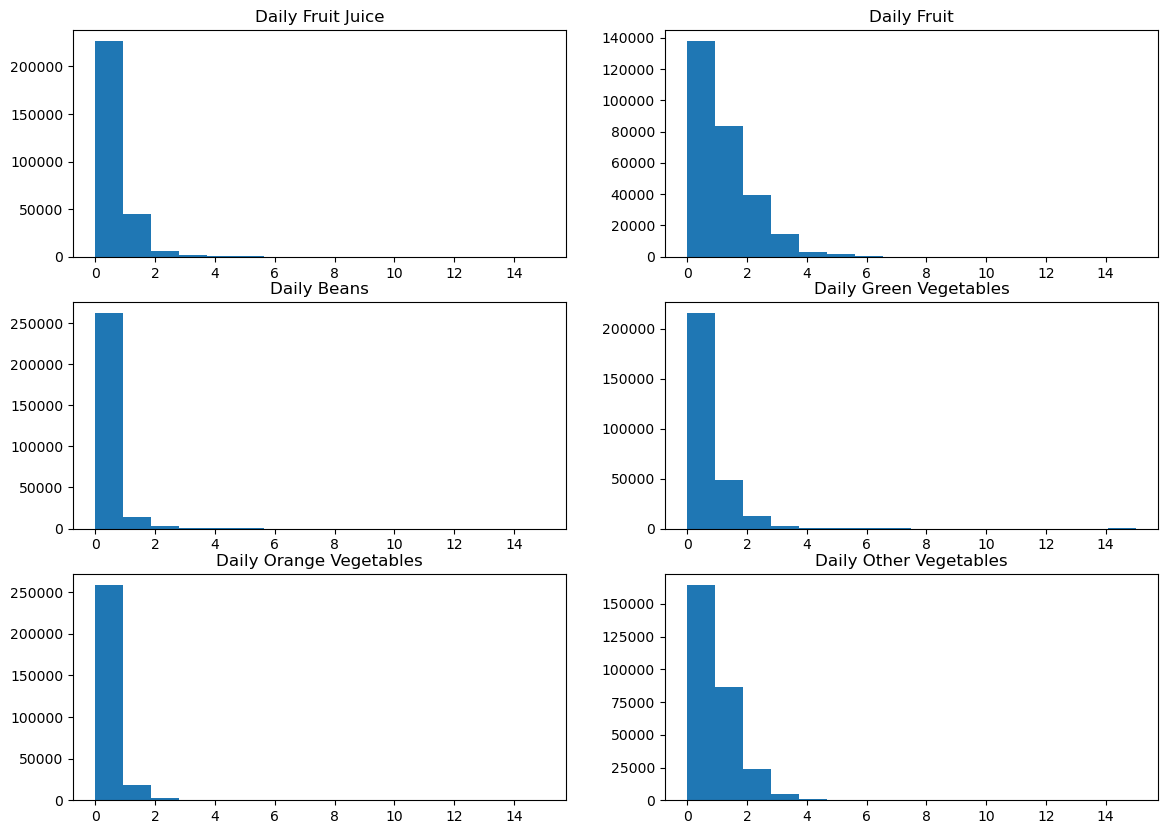

In [516]:
# 'Daily_Fruit_Juice', 'Daily_Fruits', 'Daily_Beans', 'Daily_Green_Veg', 'Daily_Orange_Veg', 'Daily_Other_Veg'

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
ax[0][0].hist(df.Daily_Fruit_Juice, bins=16)
ax[0][0].set_title("Daily Fruit Juice")

ax[0][1].hist(df.Daily_Fruits, bins=16)
ax[0][1].set_title("Daily Fruit")

ax[1][0].hist(df.Daily_Beans, bins=16)
ax[1][0].set_title("Daily Beans")

ax[1][1].hist(df.Daily_Green_Veg, bins=16)
ax[1][1].set_title("Daily Green Vegetables")

ax[2][0].hist(df.Daily_Orange_Veg, bins=16)
ax[2][0].set_title("Daily Orange Vegetables")

ax[2][1].hist(df.Daily_Other_Veg, bins=16)
ax[2][1].set_title("Daily Other Vegetables")
plt.savefig('images/fig9.png', bbox_inches='tight')

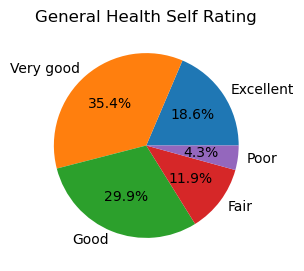

In [472]:
fig, ax = plt.subplots(figsize=(7,3))

gen_health_labels= "Excellent", "Very good", "Good", "Fair", "Poor"
GN = df.General_Health_Self_Rating.value_counts()
GN_val = GN[1], GN[2], GN[3], GN[4], GN[5]
ax.pie(GN_val, labels=gen_health_labels, autopct='%1.1f%%')
ax.set_title("General Health Self Rating")

plt.savefig('images/fig10.png', bbox_inches='tight')

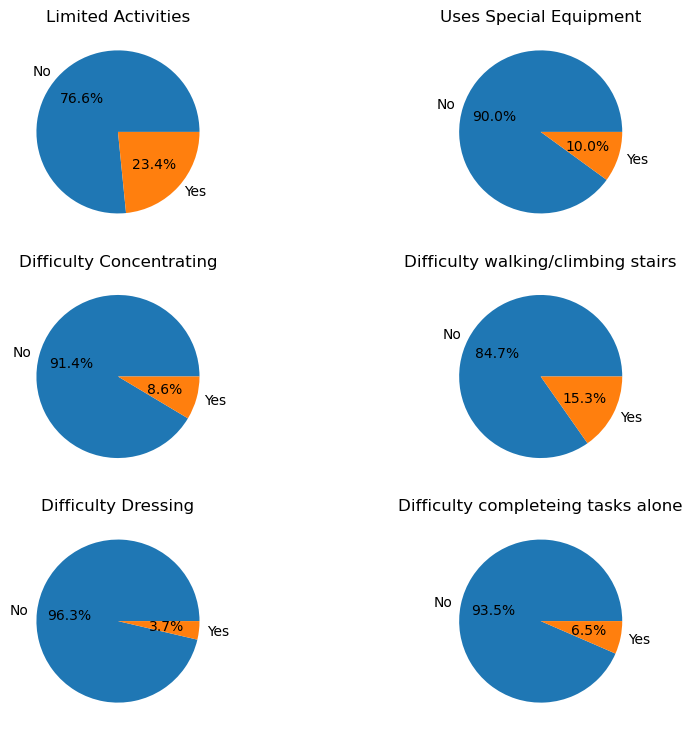

In [478]:
#3 hist
#'General_Health_Self_Rating', 1-5 Pie
#       'Limited_Activities', 0,1
#       'Uses_Special_Equipment', 'Difficulty_Concentrating',
#       'Difficulty_walking_climbing_stairs', 'Difficulty_Dressing',
#       'Difficulty_Alone',

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,9))

labels = "No", "Yes"

LA = df.Limited_Activities.value_counts() 
LA_val = LA[0], LA[1]
ax[0][0].pie(LA_val, labels=labels, autopct='%1.1f%%')
ax[0][0].set_title("Limited Activities")


SE = df.Uses_Special_Equipment.value_counts()
SE_val = SE[0], SE[1]
ax[0][1].pie(SE_val, labels=labels, autopct='%1.1f%%')
ax[0][1].set_title("Uses Special Equipment")

DC = df.Difficulty_Concentrating.value_counts()
DC_val = DC[0], DC[1]
ax[1][0].pie(DC_val, labels=labels, autopct='%1.1f%%')
ax[1][0].set_title("Difficulty Concentrating")

DW = df.Difficulty_walking_climbing_stairs.value_counts()
DW_val = DW[0], DW[1]
ax[1][1].pie(DW_val, labels=labels, autopct='%1.1f%%')
ax[1][1].set_title("Difficulty walking/climbing stairs")

DD = df.Difficulty_Dressing.value_counts()
DD_val = DD[0], DD[1]
ax[2][0].pie(DD_val, labels=labels, autopct='%1.1f%%')
ax[2][0].set_title("Difficulty Dressing")

DA = df.Difficulty_Alone.value_counts()
DA_val = DA[0], DA[1]
ax[2][1].pie(DA_val, labels=labels, autopct='%1.1f%%')
ax[2][1].set_title("Difficulty completeing tasks alone")

plt.savefig('images/fig11.png', bbox_inches='tight')

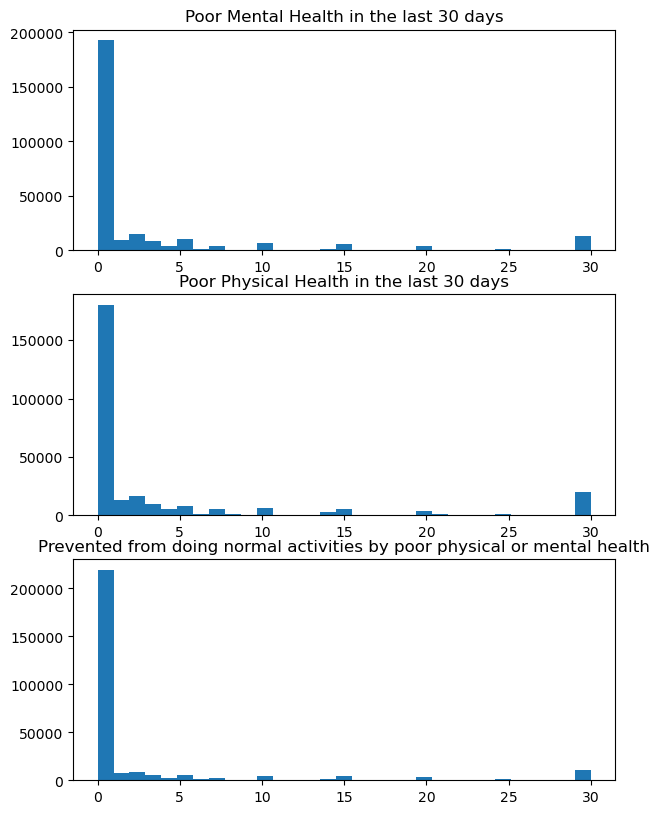

In [522]:
fig, ax = plt.subplots(nrows=3, figsize=(7,9.75))

ax[0].hist(df.Poor_Mental_Health, bins=31)
ax[0].set_title("Poor Mental Health in the last 30 days")

ax[1].hist(df.Poor_Physical_Health, bins=31)
ax[1].set_title("Poor Physical Health in the last 30 days")

ax[2].hist(df.Kept_from_doing_activities, bins=31)
ax[2].set_title("Prevented from doing normal activities by poor physical or mental health")

plt.savefig('images/fig12.png', bbox_inches='tight')

In [556]:
# correlations = df.corr()
# heatmap = px.imshow(df.corr(), width=1200, height=1200, title="Correlation Heatmap")
# heatmap.write_html("images/corr_heatmap.html")

In [552]:
#correlations = df.corr()
# correlations

In [554]:
# fig, ax = plt.subplots(figsize=(30,30))
# sns.heatmap(correlations, annot=True, fmt=".1f")
# plt.savefig('corr_heatmap.png', bbox_inches='tight')

In [54]:
diabetes = df.groupby(['Diabetes']).mean()
# diabetes

,Sex,Education_Level,Household_Income,Veteran,Age,High_Blood_Pressure,Blood_Pressure_Meds,High_Cholesterol,Heart_Attack,Angina/Heart_Disease,...,Uses_Special_Equipment,Difficulty_Concentrating,Difficulty_walking_climbing_stairs,Difficulty_Dressing,Difficulty_Alone,Black_(Non-Hispanic),Hispanic,Multiracial_(Non-Hispanic),Other_race_only,White_(Non-Hispanic)
Diabetes,,,,,,,,,,,,,,,,,,,,,
0.0,0.444668,5.058095,46.375142,0.127969,53.235788,0.355038,0.268723,0.324152,0.038976,0.041029,...,0.078076,0.075028,0.120475,0.028493,0.053056,0.065725,0.042304,0.074635,0.018921,0.798414
1.0,0.472886,4.744000,35.947074,0.197661,63.249821,0.743847,0.671262,0.640906,0.133910,0.142923,...,0.235626,0.152267,0.351409,0.086448,0.140268,0.115400,0.047820,0.089588,0.022059,0.725133


In [134]:
diabetes_mean = df.drop(["Diabetes"], axis=1, inplace=False).mean()

In [560]:
df.columns

Index(['Sex', 'Education_Level', 'Household_Income', 'Veteran', 'Age',
       'High_Blood_Pressure', 'Blood_Pressure_Meds', 'High_Cholesterol',
       'Heart_Attack', 'Angina/Heart_Disease', 'Stroke', 'Asthma_(ever)',
       'Asthma_(currently)', 'Skin_Cancer', 'Cancer_(not skin)',
       'COPD_emphasema_chronic_bronchitis',
       'Arthritis_RA_gout_lupus_fibromyalgia', 'Depression', 'Kidney_Disease',
       'Diabetes', 'Smoker', 'Days_at_least_1_drink_recently',
       'Binge_Drinking_last_30_days', 'Chewing_tobacco', 'Any_Excercise',
       'Strength_Excercise', 'Aerobic_Excercise', 'Daily_Fruit_Juice',
       'Daily_Fruits', 'Daily_Beans', 'Daily_Green_Veg', 'Daily_Orange_Veg',
       'Daily_Other_Veg', 'BMI', 'Has_Health_Coverage',
       'Could_not_afford_to_see_doctor', 'General_Health_Self_Rating',
       'Poor_Mental_Health', 'Poor_Physical_Health',
       'Kept_from_doing_activities', 'Limited_Activities',
       'Uses_Special_Equipment', 'Difficulty_Concentrating',
       'D

In [564]:
column_list = ['Heart_Attack', 'Angina/Heart_Disease', 'Stroke', 'Asthma_(ever)',
       'Asthma_(currently)', 'Skin_Cancer', 'Cancer_(not skin)',
       'COPD_emphasema_chronic_bronchitis',
       'Arthritis_RA_gout_lupus_fibromyalgia', 'Depression', 'Kidney_Disease',
       'Diabetes', 'Sex']

In [574]:
for column in column_list:
    feature = df.groupby([column]).mean()
    difference = feature.loc[0] - feature.loc[1]
    feature_trans = feature.transpose()
    feature_trans.insert(2, "Difference", difference, True)
    feature_trans.insert(3, "Percent Difference", (difference/feature.loc[0])*100, True)
    feature_trans.to_csv(f"CSV_files/{column.replace('/', '-')}_corr.csv")

In [140]:
diabetes_trans = diabetes.transpose()
difference = diabetes.loc[0] - diabetes.loc[1]
diabetes_trans.insert(2, "Difference", difference, True)
diabetes_trans.insert(3, "Percent Difference", difference/diabetes.loc[0], True)
diabetes_trans.insert(4, "Div by mean", difference/diabetes_mean, True)
diabetes_trans

Diabetes,0.0,1.0,Difference,Percent Difference,Div by mean
Sex,0.444668,0.472886,-0.028218,-0.063458,-0.062901
Education_Level,5.058095,4.744000,0.314095,0.062097,0.062640
Household_Income,46.375142,35.947074,10.428068,0.224863,0.232147
Veteran,0.127969,0.197661,-0.069692,-0.544603,-0.506141
Age,53.235788,63.249821,-10.014034,-0.188107,-0.183296
High_Blood_Pressure,0.355038,0.743847,-0.388809,-1.095122,-0.949960
Blood_Pressure_Meds,0.268723,0.671262,-0.402539,-1.497971,-1.238996
High_Cholesterol,0.324152,0.640906,-0.316754,-0.977178,-0.859926
Heart_Attack,0.038976,0.133910,-0.094935,-2.435737,-1.817889
Angina/Heart_Disease,0.041029,0.142923,-0.101894,-2.483437,-1.844327


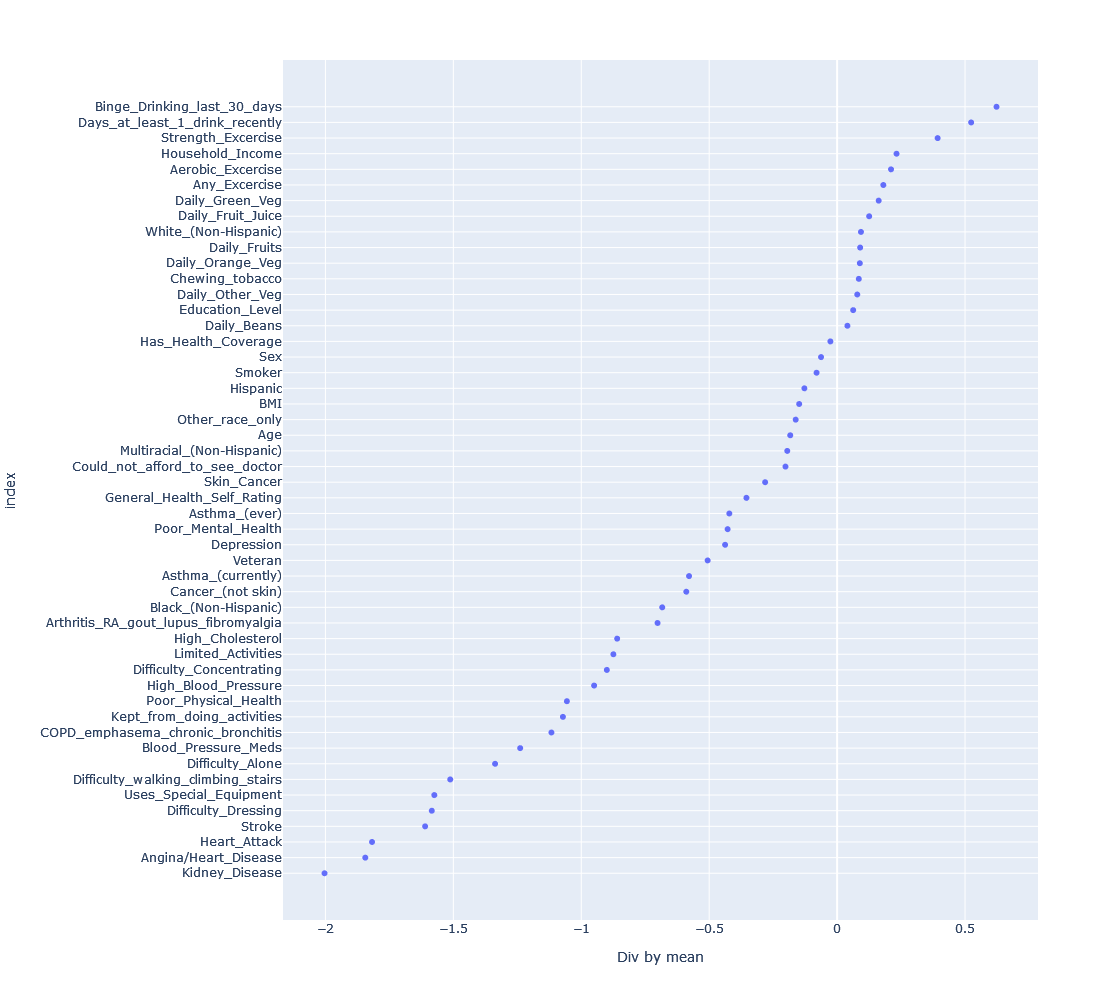

In [166]:
px.scatter(diabetes_trans.sort_values(by="Div by mean", inplace=False), x="Div by mean", height=1000)

In [338]:
#px.density_heatmap(df[df.Diabetes ==1], x="Aerobic_Excercise", y="Strength_Excercise")

# fig = px.violin(df, y="Household_Income",color="Diabetes", hover_data=df.columns)
# fig.show()

In [340]:
#fig = px.violin(df[df.Days_at_least_1_drink_recently > 0], y="Days_at_least_1_drink_recently",color="Diabetes", hover_data=df.columns)
# fig.show()

In [142]:
diabetes_trans.sort_values(by="Div by mean", inplace=False)

Diabetes,0.0,1.0,Difference,Percent Difference,Div by mean
Kidney_Disease,0.024179,0.091427,-0.067248,-2.781291,-2.003684
Angina/Heart_Disease,0.041029,0.142923,-0.101894,-2.483437,-1.844327
Heart_Attack,0.038976,0.133910,-0.094935,-2.435737,-1.817889
Stroke,0.027785,0.085503,-0.057719,-2.077348,-1.610518
Difficulty_Dressing,0.028493,0.086448,-0.057955,-2.034038,-1.584363
Uses_Special_Equipment,0.078076,0.235626,-0.157550,-2.017920,-1.574567
Difficulty_walking_climbing_stairs,0.120475,0.351409,-0.230934,-1.916858,-1.512350
Difficulty_Alone,0.053056,0.140268,-0.087211,-1.643740,-1.337070
Blood_Pressure_Meds,0.268723,0.671262,-0.402539,-1.497971,-1.238996
COPD_emphasema_chronic_bronchitis,0.062484,0.145144,-0.082660,-1.322910,-1.116763


In [64]:
heart_disease = df.groupby(["Angina/Heart_Disease"]).mean()
heart_disease_trans = heart_disease.transpose()
heart_disease_trans.insert(2, "Difference", (heart_disease.loc[0] - heart_disease.loc[1]), True)
heart_disease_trans

Angina/Heart_Disease,0.0,1.0,Difference
Sex,0.441354,0.572608,-0.131253
Education_Level,5.026660,4.802360,0.224300
Household_Income,45.427949,36.234847,9.193103
Veteran,0.129331,0.280694,-0.151363
Age,53.879481,67.520377,-13.640895
High_Blood_Pressure,0.387854,0.775858,-0.388003
Blood_Pressure_Meds,0.301865,0.718661,-0.416797
High_Cholesterol,0.347970,0.716856,-0.368885
Heart_Attack,0.027180,0.480462,-0.453282
Stroke,0.028700,0.157918,-0.129219


In [66]:
aerobic = df.groupby(["Aerobic_Excercise"]).mean()
aerobic_trans = aerobic.transpose()
aerobic_trans.insert(2, "Difference", (aerobic.loc[0] - aerobic.loc[1]), True)
aerobic_trans

Aerobic_Excercise,0.0,1.0,Difference
Sex,0.434705,0.460585,-0.025880
Education_Level,4.857651,5.149242,-0.291591
Household_Income,40.991734,48.305520,-7.313786
Veteran,0.126911,0.146986,-0.020076
Age,54.050934,55.134816,-1.083882
High_Blood_Pressure,0.444272,0.379143,0.065129
Blood_Pressure_Meds,0.355796,0.298258,0.057538
High_Cholesterol,0.386134,0.353023,0.033111
Heart_Attack,0.060562,0.045036,0.015526
Angina/Heart_Disease,0.063101,0.048478,0.014623


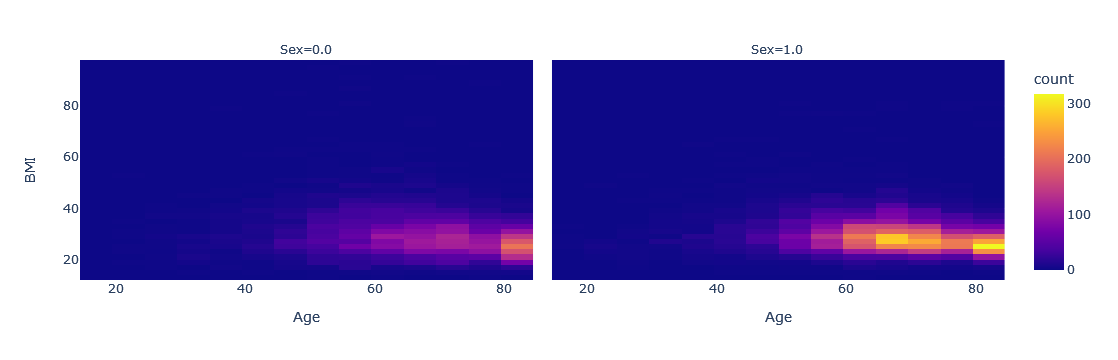

In [116]:
px.density_heatmap(df[df.Heart_Attack == 1], x="Age", y="BMI", facet_col="Sex")


diabetes = df.groupby(['Diabetes']).mean()
diabetes_mean = df.drop(["Diabetes"], axis=1, inplace=False).mean()
diabetes_trans = diabetes.transpose()
difference = diabetes.loc[0] - diabetes.loc[1]
diabetes_trans.insert(2, "Difference", difference, True)
diabetes_trans.insert(3, "Percent Difference", difference/diabetes.loc[0], True)
diabetes_trans.insert(4, "Div by mean", difference/diabetes_mean, True)
diabetes_trans



In [195]:
sex = df.groupby(["Sex"]).mean()
sex_mean = df.drop(["Sex"], axis=1, inplace=False).mean()
sex_trans = sex.transpose()
difference = sex.loc[0] - sex.loc[1]
sex_trans.insert(2, "Difference", difference, True)
sex_trans.insert(3, "Diff/Mean", difference/sex_mean, True)
sex_trans.sort_values(by="Diff/Mean", inplace=False)

Sex,0.0,1.0,Difference,Diff/Mean
Veteran,0.022813,0.278896,-0.256083,-1.859802
Chewing_tobacco,0.010686,0.101672,-0.090985,-1.766609
Binge_Drinking_last_30_days,0.244699,0.544665,-0.299967,-0.790914
Heart_Attack,0.037641,0.070145,-0.032504,-0.622413
Days_at_least_1_drink_recently,2.898526,4.868541,-1.970015,-0.520853
Angina/Heart_Disease,0.042823,0.070518,-0.027696,-0.501304
Strength_Excercise,0.263287,0.318142,-0.054855,-0.190538
Hispanic,0.039670,0.047258,-0.007589,-0.176175
Daily_Fruit_Juice,0.321433,0.382084,-0.060651,-0.173963
Smoker,0.766640,0.906150,-0.139511,-0.168242


In [580]:
income

,Sex,Education_Level,Veteran,Age,High_Blood_Pressure,Blood_Pressure_Meds,High_Cholesterol,Heart_Attack,Angina/Heart_Disease,Stroke,...,Uses_Special_Equipment,Difficulty_Concentrating,Difficulty_walking_climbing_stairs,Difficulty_Dressing,Difficulty_Alone,Black_(Non-Hispanic),Hispanic,Multiracial_(Non-Hispanic),Other_race_only,White_(Non-Hispanic)
Household_Income,,,,,,,,,,,,,,,,,,,,,
0.0,0.344996,4.170716,0.059862,51.324102,0.483791,0.374430,0.371445,0.084902,0.079181,0.074869,...,0.228505,0.272697,0.373518,0.131581,0.222287,0.166155,0.072133,0.222287,0.032667,0.506757
10.0,0.341999,4.286110,0.093722,57.389497,0.542853,0.444636,0.431675,0.106608,0.103012,0.085406,...,0.263111,0.239137,0.397513,0.121741,0.209694,0.125936,0.048996,0.151558,0.024723,0.648786
15.0,0.364834,4.365905,0.107726,56.159126,0.499009,0.405097,0.384965,0.089682,0.080955,0.068855,...,0.194678,0.175456,0.302511,0.079617,0.146865,0.132141,0.053328,0.149435,0.024362,0.640735
20.0,0.380469,4.524586,0.132631,56.631017,0.480964,0.392428,0.380211,0.076920,0.075629,0.054549,...,0.155474,0.138137,0.244784,0.056872,0.107034,0.102259,0.044612,0.117660,0.023145,0.712325
25.0,0.411526,4.716401,0.149612,57.121834,0.462350,0.377962,0.382864,0.067504,0.070227,0.046569,...,0.123570,0.099469,0.193355,0.042450,0.075742,0.086567,0.043062,0.096099,0.020561,0.753711
35.0,0.450376,4.946784,0.164985,56.116666,0.435295,0.351474,0.375584,0.055676,0.057300,0.033927,...,0.091571,0.070068,0.143532,0.026251,0.046991,0.070093,0.038577,0.066476,0.018870,0.805983
50.0,0.472083,5.178223,0.160135,54.588570,0.395104,0.313519,0.374321,0.042374,0.047936,0.025900,...,0.066449,0.051609,0.102645,0.019935,0.034923,0.056789,0.036345,0.048934,0.017430,0.840502
75.0,0.508167,5.504218,0.134437,52.522484,0.326476,0.248343,0.342684,0.026048,0.033851,0.015544,...,0.042464,0.030297,0.055722,0.010328,0.018889,0.039461,0.041446,0.036116,0.015845,0.867132


In [576]:
income = df.groupby(["Household_Income"]).mean()
income_trans = income.transpose()
income_trans

Household_Income,0.0,10.0,15.0,20.0,25.0,35.0,50.0,75.0
Sex,0.344996,0.341999,0.364834,0.380469,0.411526,0.450376,0.472083,0.508167
Education_Level,4.170716,4.286110,4.365905,4.524586,4.716401,4.946784,5.178223,5.504218
Veteran,0.059862,0.093722,0.107726,0.132631,0.149612,0.164985,0.160135,0.134437
Age,51.324102,57.389497,56.159126,56.631017,57.121834,56.116666,54.588570,52.522484
High_Blood_Pressure,0.483791,0.542853,0.499009,0.480964,0.462350,0.435295,0.395104,0.326476
Blood_Pressure_Meds,0.374430,0.444636,0.405097,0.392428,0.377962,0.351474,0.313519,0.248343
High_Cholesterol,0.371445,0.431675,0.384965,0.380211,0.382864,0.375584,0.374321,0.342684
Heart_Attack,0.084902,0.106608,0.089682,0.076920,0.067504,0.055676,0.042374,0.026048
Angina/Heart_Disease,0.079181,0.103012,0.080955,0.075629,0.070227,0.057300,0.047936,0.033851
Stroke,0.074869,0.085406,0.068855,0.054549,0.046569,0.033927,0.025900,0.015544


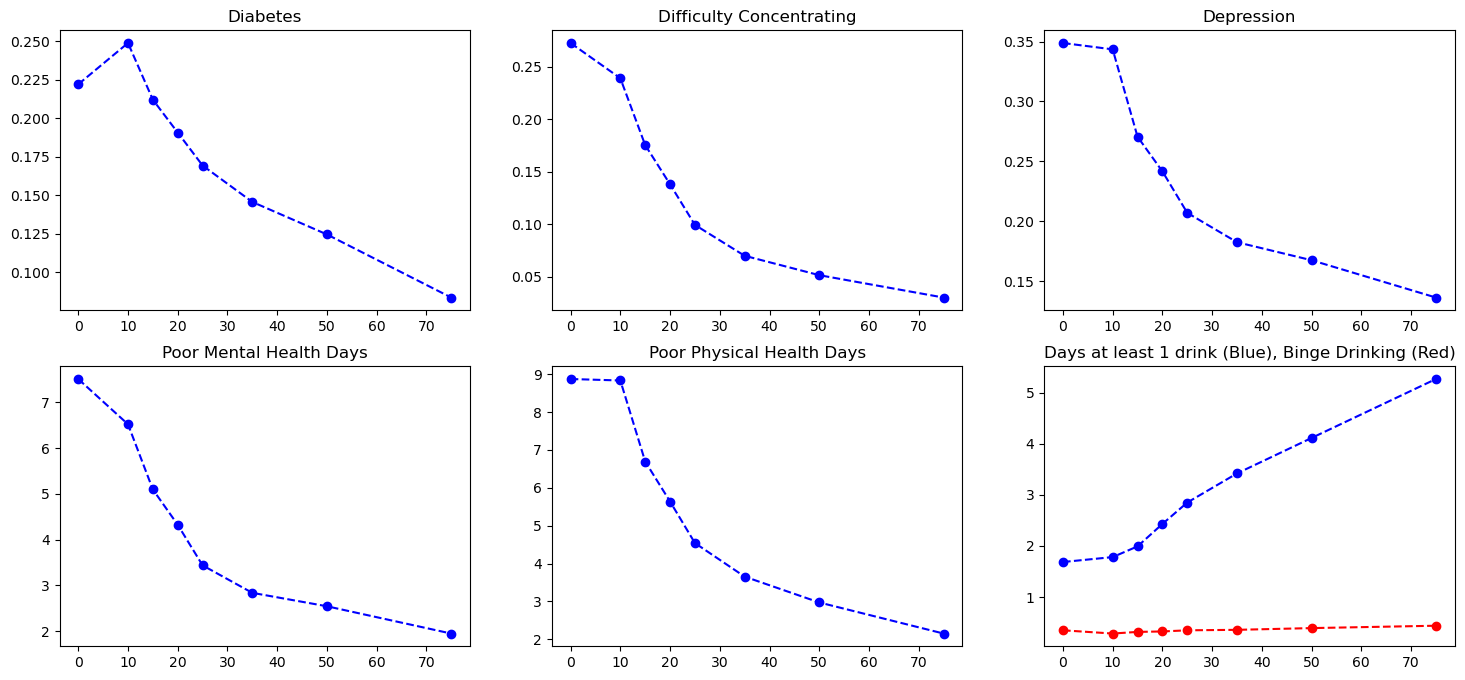

In [678]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
income_cats = [0, 10, 15, 20, 25, 35, 50, 75]

ax[0][0].plot(income_cats, income.Diabetes, 'bo--')
ax[0][0].set_title("Diabetes")

ax[0][1].plot(income_cats, income.Difficulty_Concentrating, 'bo--')
ax[0][1].set_title("Difficulty Concentrating")

ax[0][2].plot(income_cats, income.Depression, 'bo--')
ax[0][2].set_title("Depression")

ax[1][0].plot(income_cats, income.Poor_Mental_Health, 'bo--')
ax[1][0].set_title("Poor Mental Health Days")

ax[1][1].plot(income_cats, income.Poor_Physical_Health, 'bo--')
ax[1][1].set_title("Poor Physical Health Days")

ax[1][2].plot(income_cats, income.Days_at_least_1_drink_recently, 'bo--')
ax[1][2].plot(income_cats, income.Binge_Drinking_last_30_days, 'ro--', label='binge drinking')
ax[1][2].set_title("Days at least 1 drink (Blue), Binge Drinking (Red)")


### smoker, depression, Difficulty_Concentrating, Poor_Mental_Health, Poor_Physical_Health, Days_at_least_1_drink_recently, Kept_from_doing_activities
plt.savefig('images/income.png', bbox_inches='tight')

In [638]:
age = df.groupby(['Age']).mean()
age

,Sex,Education_Level,Household_Income,Veteran,High_Blood_Pressure,Blood_Pressure_Meds,High_Cholesterol,Heart_Attack,Angina/Heart_Disease,Stroke,...,Uses_Special_Equipment,Difficulty_Concentrating,Difficulty_walking_climbing_stairs,Difficulty_Dressing,Difficulty_Alone,Black_(Non-Hispanic),Hispanic,Multiracial_(Non-Hispanic),Other_race_only,White_(Non-Hispanic)
Age,,,,,,,,,,,,,,,,,,,,,
18.0,0.549775,3.980732,43.654464,0.019910,0.068080,0.007065,0.034682,0.001285,0.002569,0.001927,...,0.011561,0.089274,0.014772,0.004496,0.026975,0.073218,0.075145,0.156712,0.046243,0.648683
19.0,0.550562,4.489095,39.491077,0.033047,0.064772,0.005948,0.031064,0.001983,0.003966,0.003305,...,0.020489,0.093192,0.019828,0.009253,0.033708,0.083939,0.077330,0.164574,0.041639,0.632518
20.0,0.541766,4.634845,36.330549,0.045943,0.074582,0.005967,0.034010,0.000000,0.000000,0.001790,...,0.007757,0.102625,0.020286,0.004177,0.031623,0.073986,0.089499,0.150358,0.044153,0.642005
21.0,0.516945,4.774406,34.119879,0.045524,0.077390,0.009105,0.036925,0.004047,0.003035,0.003541,...,0.010116,0.077896,0.014669,0.003541,0.023773,0.080931,0.073849,0.148710,0.044006,0.652504
22.0,0.540701,4.991613,35.162802,0.047361,0.080908,0.008387,0.034534,0.002960,0.002960,0.002467,...,0.011840,0.087815,0.019734,0.000493,0.023187,0.071041,0.080908,0.151455,0.035520,0.661075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76.0,0.429616,4.835161,37.480195,0.257770,0.655088,0.604205,0.536868,0.104509,0.130713,0.075868,...,0.172456,0.065204,0.247105,0.039001,0.070993,0.055759,0.025899,0.041133,0.013406,0.863803
77.0,0.405414,4.831287,36.551778,0.244885,0.644948,0.586402,0.535411,0.113314,0.128108,0.078376,...,0.173119,0.070507,0.255272,0.042493,0.077117,0.052565,0.020460,0.034309,0.009758,0.882908
78.0,0.404389,4.787530,35.684431,0.255660,0.672936,0.618251,0.536747,0.122257,0.128875,0.081156,...,0.190178,0.076280,0.263671,0.042146,0.081853,0.049112,0.027168,0.036921,0.011494,0.875305


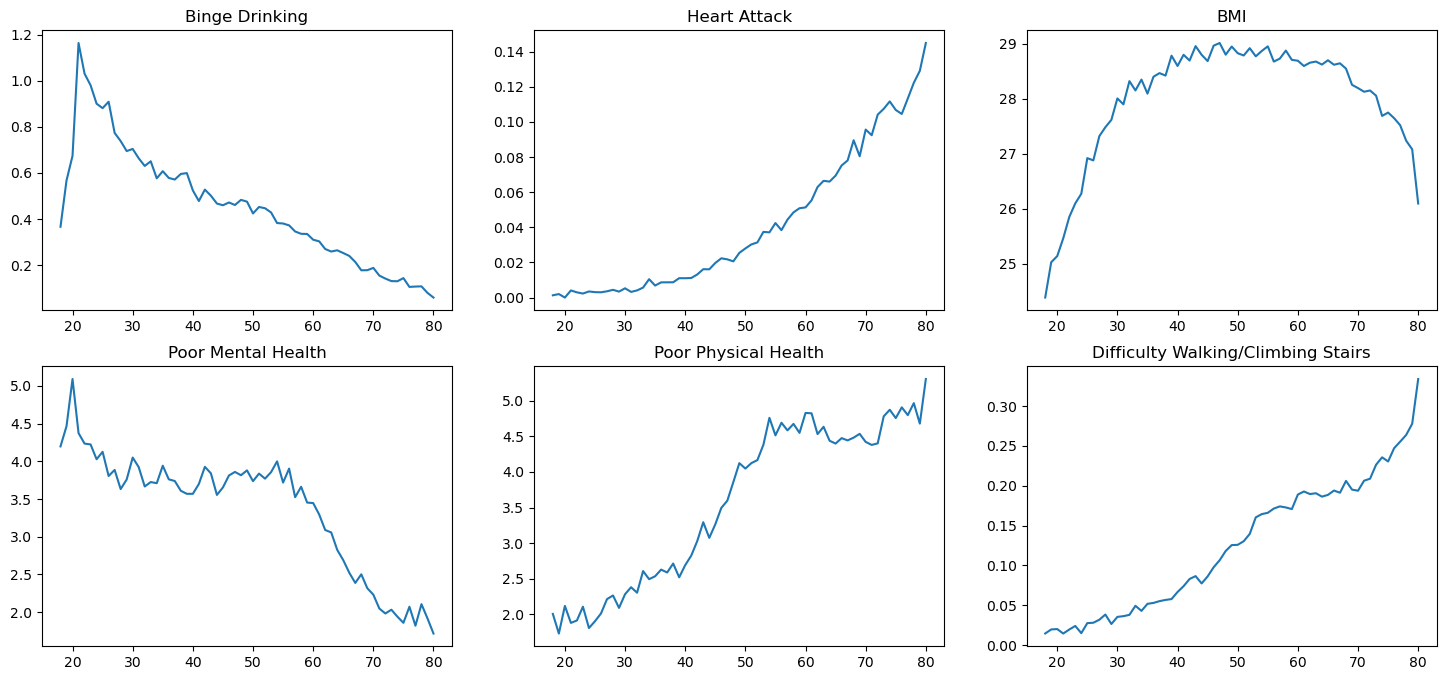

In [682]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

ages = np.arange(18,81)

ax[0][0].plot(ages, age.Binge_Drinking_last_30_days)
ax[0][0].set_title("Binge Drinking")

ax[0][1].plot(ages, age.Heart_Attack)
ax[0][1].set_title("Heart Attack")

ax[0][2].plot(ages, age.BMI)
ax[0][2].set_title("BMI")

ax[1][0].plot(ages, age.Poor_Mental_Health)
ax[1][0].set_title("Poor Mental Health")

ax[1][1].plot(ages, age.Poor_Physical_Health)
ax[1][1].set_title("Poor Physical Health")

ax[1][2].plot(ages, age.Difficulty_walking_climbing_stairs)
ax[1][2].set_title("Difficulty Walking/Climbing Stairs")
plt.savefig('images/age.png', bbox_inches='tight')